In [2]:
%cd ../..

/home/matej/prace/ferda/ferda_regtrack


In [3]:
import cv2
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pylab as plt
import graph_tool.all as gt
from skimage.util import montage
import pandas as pd
from utils.img import safe_crop
from core.region.transformableregion import TransformableRegion
from core.interactions.visualization import plot_interaction, save_prediction_img
from core.interactions.detect import InteractionDetector
from core.project.project import Project
from utils.video_manager import get_auto_video_manager

/home/matej/.conda/envs/ferda/lib/python2.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named gi; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)
Using TensorFlow backend.


In [5]:
project = Project('/datagrid/ferda/projects/1_initial_projects_180921_ILP/180810_2359_Cam1_ILP_cardinality')
# project = Project('../projects/2_temp/180810_2359_Cam1_ILP_cardinality')
vm = get_auto_video_manager(project)
gm = project.gm
rm = project.rm

Initializing db at /datagrid/ferda/projects/1_initial_projects_180921_ILP/180810_2359_Cam1_ILP_cardinality/rm.sqlite3 
saving chm
saving GM


In [27]:
# detector = InteractionDetector('/home/matej/prace/ferda/experiments/180831_1121_single_100')
# detector = InteractionDetector('/home/matej/prace/ferda/experiments/180830_1637_single_50')
# detector = InteractionDetector('/home/matej/prace/ferda/experiments/180913_1446_single_dense32_alpha0_01')
# detector = InteractionDetector('/home/matej/prace/ferda/experiments/180913_1531_single_concat_mp_alpha0_01')
# detector = InteractionDetector('/datagrid/ferda/models/180913_1533_tracker_single_concat_conv3_alpha0_01', project)
detector = InteractionDetector('/datagrid/ferda/models/181101_1537_tracker_cam1_1k_aug', project)

In [7]:
dense_subgraphs = detector.find_dense_subgraphs()
dense_subgraphs = sorted(dense_subgraphs, key=lambda x: len(x['ids']), reverse=True)
# df_ilp = pd.DataFrame([len(x['ids']) for x in dense_subgraphs])

In [8]:
# df.columns = ['no ilp',]
# ax = df.plot(figsize=(8, 8))
# df_ilp.columns = ['ilp',]
# df_ilp.plot(ax=ax)

16


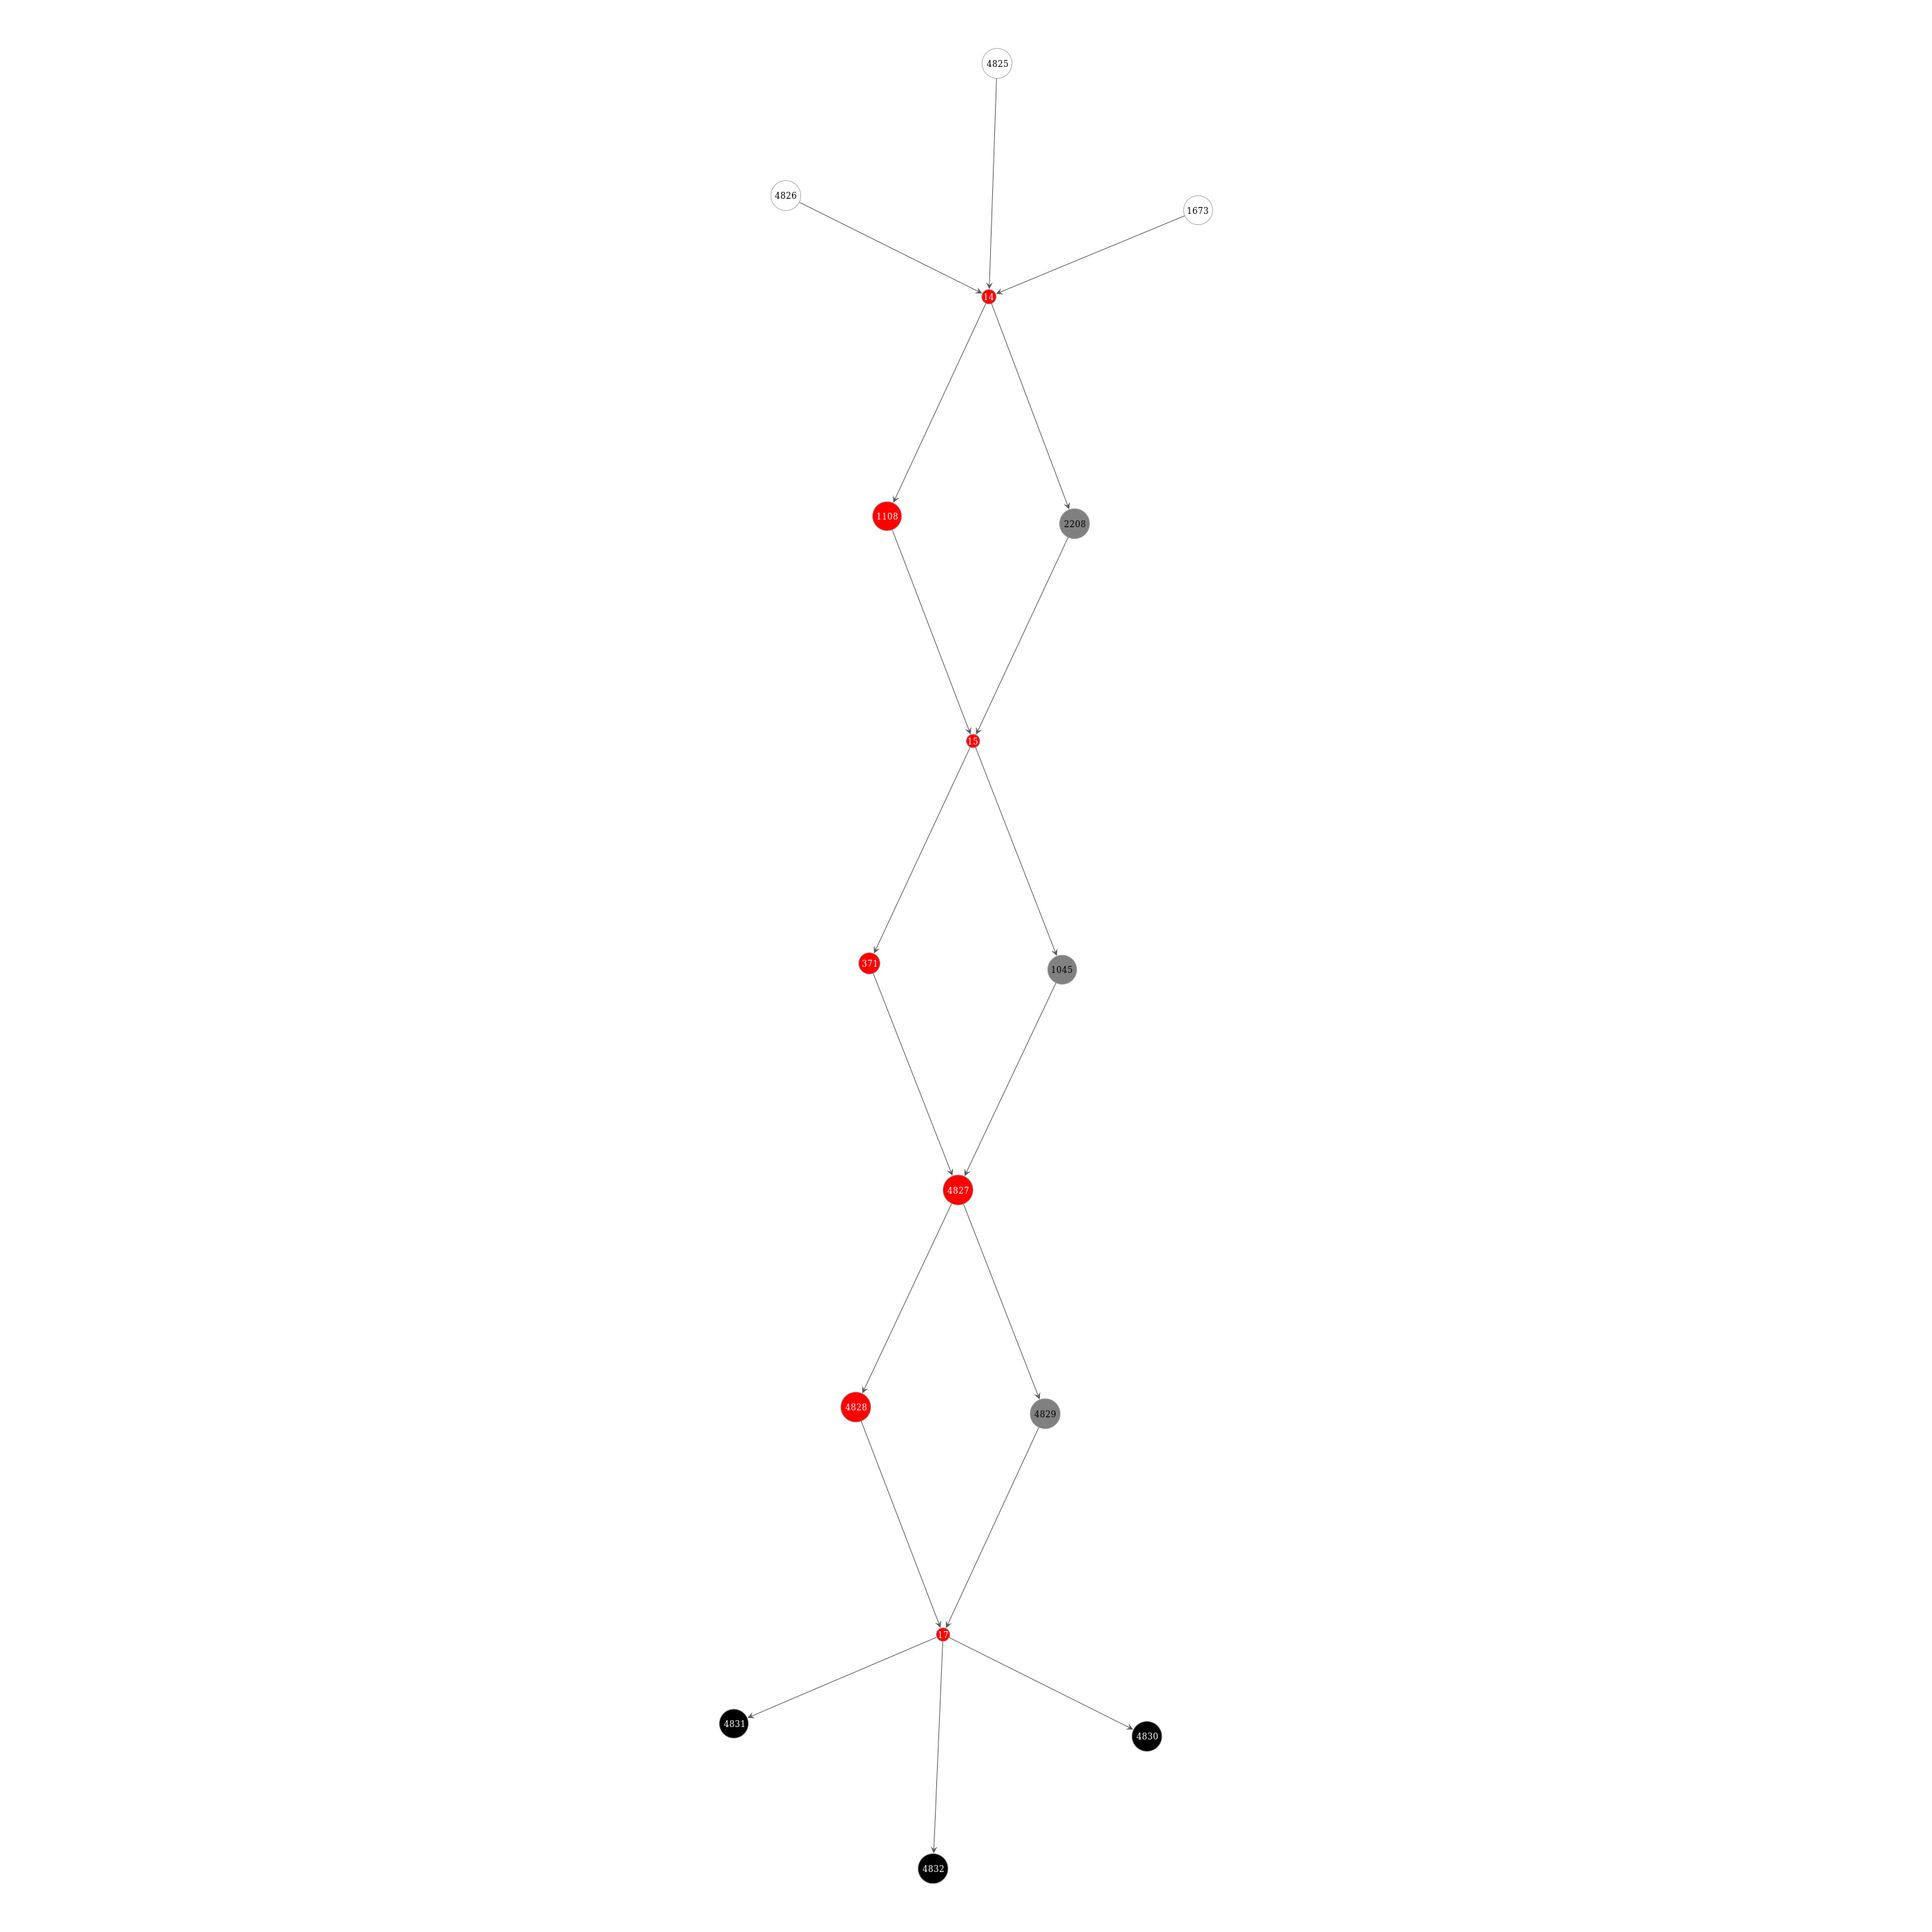

In [21]:
i = 7
graph = dense_subgraphs[i]['graph']
ids = dense_subgraphs[i]['ids']
print(graph.num_vertices())
# print(detector.get_bounds(graph))
detector.draw_graph(graph)

In [46]:
# del graph.vp['tracklet']
graph.save('out/graph.gt')

In [28]:
tracklets = detector.track_dense(graph, ids)

outcoming: 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]


In [29]:
tracklets

[]

0.14401755738861421
2.6531516517037725
2.9389168856305012
0.31507948412943254


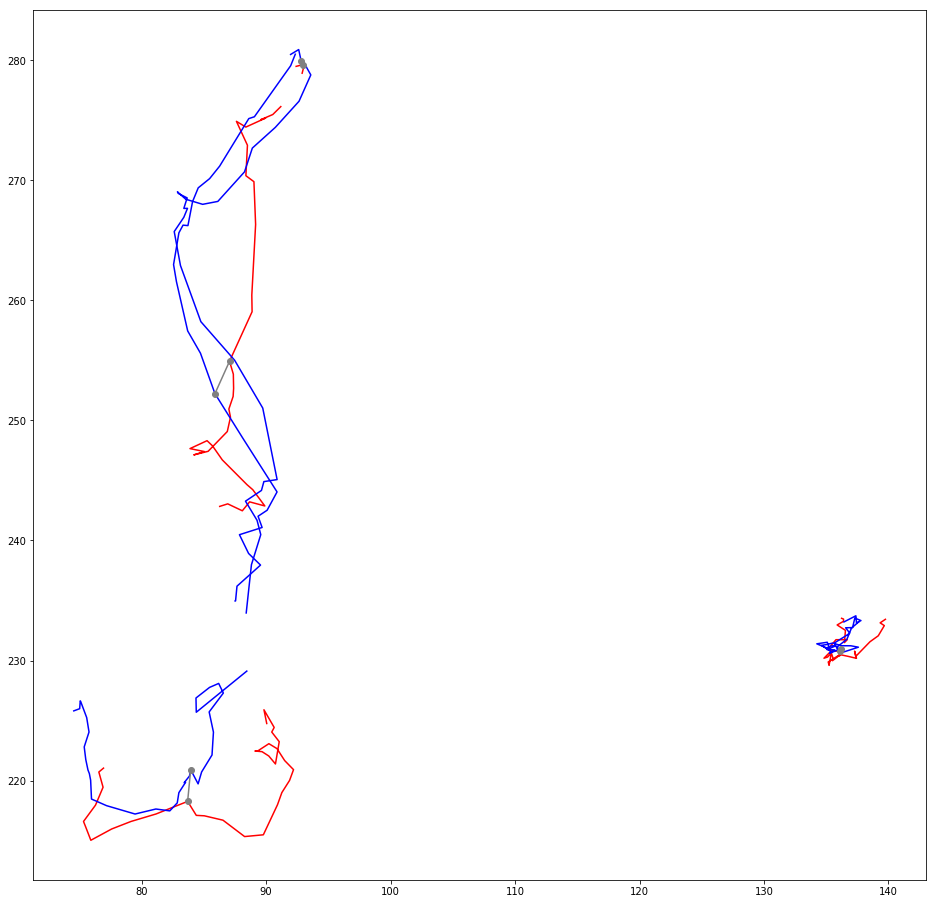

In [444]:
%matplotlib inline
# qt4
plt.figure(figsize=(16, 16))
for paths, color in zip((fwd, bwd), ('r', 'b')):
    for path in paths:
        plt.plot([r.x for r in path], [r.y for r in path], color=color)
for i, j in zip(ii, jj):
    p1 = {el.frame: el for el in fwd[i]}
    p2 = {el.frame: el for el in bwd[j]}
    frame = frames_matrix[i, j]
    mean_major_px = np.concatenate(([el.major for el in fwd[i]], [el.major for el in bwd[j]])).mean()
    print(cost_matrix[i, j])
    if cost_matrix[i, j] > mean_major_px:
        color = 'black'
    else:
        color = 'gray'
    plt.plot(*p1[frame].xy, marker='o', color=color)
    plt.plot(*p2[frame].xy, marker='o', color=color)   
    plt.plot(*np.vstack((p1[frame].xy, p2[frame].xy)).T, color=color) 
   

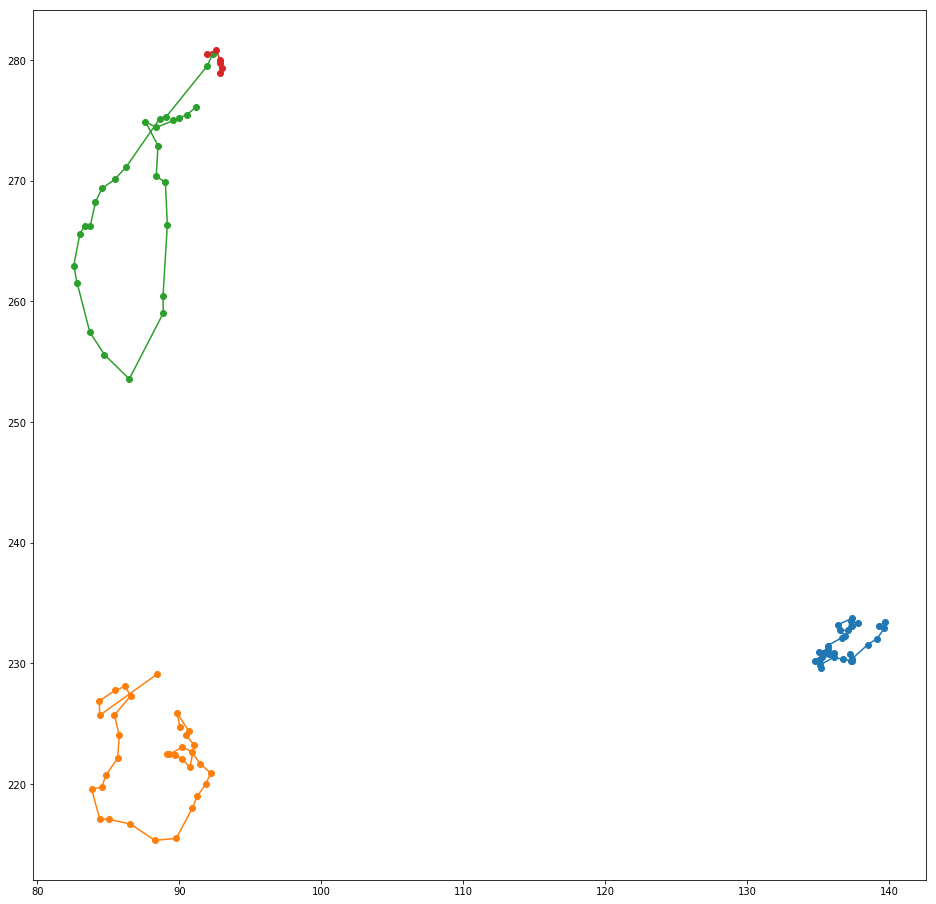

In [445]:


plt.figure(figsize=(16, 16))
for path in paths:
    plt.plot([r.x for r in path], [r.y for r in path], '-o')  
    
    

In [446]:
detector.visualize_tracklets(graph, paths, 'out/xxx')

175

In [410]:
[el.frame for el in fwd[i]]

[175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]

In [411]:
[el.frame for el in bwd[j]]

[173, 174, 175]

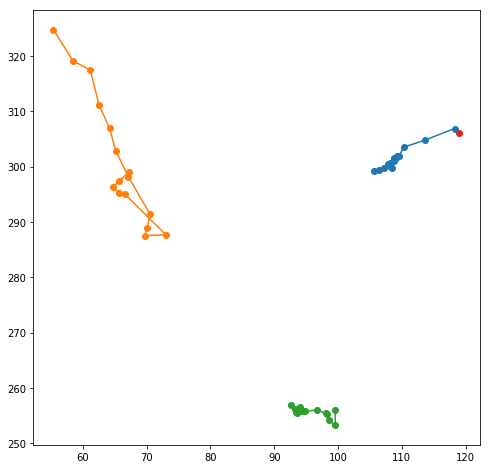

In [429]:
paths = []
for i, j in zip(ii, jj):
    p1 = {el.frame: el for el in fwd[i]}
    p2 = {el.frame: el for el in bwd[j]}    
    mean_major_px = np.concatenate(([el.major for el in fwd[i]], [el.major for el in bwd[j]])).mean()
    if cost_matrix[i, j] > 2 * mean_major_px:
        color = 'black'
    else:
        color = 'gray'
    frame = frames_matrix[i, j]  
    fwd_idx = [el.frame for el in fwd[i]].index(frame)
    bwd_idx = [el.frame for el in bwd[j]].index(frame)
    mean_el = fwd[i][fwd_idx] + bwd[j][bwd_idx]
    paths.append(fwd[i][:fwd_idx] + [mean_el] + bwd[j][bwd_idx + 1:])

plt.figure(figsize=(8, 8))
for path in paths:
    plt.plot([r.x for r in path], [r.y for r in path], '-o')  


In [370]:
[el.frame for el in paths[1]]

[1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995]

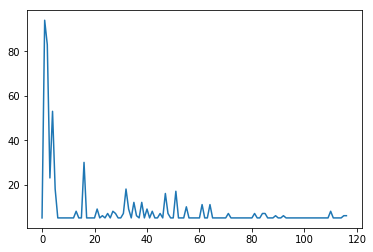

In [113]:
plt.plot(range(len(dense_subgraphs)), [dense['graph'].num_vertices() for dense in dense_subgraphs])

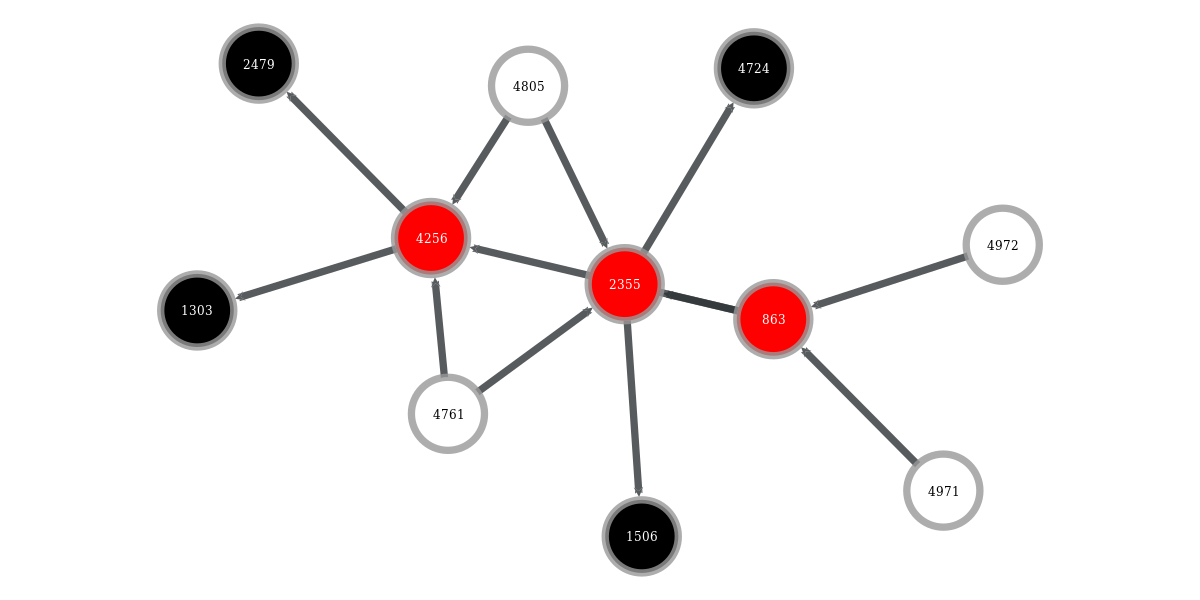

In [115]:
graph = dense_subgraphs[61]['graph']
detector.draw_graph(graph)

In [68]:
min([t.end_frame(gm) for t in interaction_in])

2004

In [69]:
max([t.start_frame(gm) for t in interaction_out])

2009

In [12]:
# images = []
# regions = []
# for t in interaction_in[1:5]:
#     r = t.get_region(project.gm, -1) 
#     regions.append(r)
#     img = project.img_manager.get_whole_img(r.frame())
#     prediction = detector.region_to_dict(r)
#     prediction['0_angle_deg'] *= -1
# #     images.append(safe_crop(save_prediction_img(None, 1, img, pred=prediction, scale=1.1), 
# #                          tuple([prediction[x] for x in ('0_x', '0_y')]), 200)[0])
#     images.append(save_prediction_img(None, 1, img, pred=prediction, scale=1.1))
# #    images.append(img)
    
    
# roi_union = reduce(lambda x, y: x.union(y), [r.roi() for r in regions])

# plt.figure(figsize=(10, 10))
# img = np.array(images).mean(axis=0).astype(np.uint8)
# plt.imshow(img[roi_union.slices()])

# # plt.figure(figsize=(16, 16))
# # plt.axis('off')

# # plt.imshow(montage(np.array(images), multichannel=True, padding_width=5, fill=(255, 255, 255)))    

In [13]:
# plt.figure(figsize=(16, 16))
# plt.imshow(img)
# polygons = []
# for r in regions:
#     el = {key: int(value) for key, value in detector.region_to_dict(r).iteritems()}
#     el['0_angle_deg'] *= -1    
#     poly = cv2.ellipse2Poly((el['0_x'], el['0_y']), (el['0_major'] / 2, el['0_minor'] / 2), el['0_angle_deg'], 0, 360, 30)
#     polygons.append(poly)
#     plt.plot(poly[:, 0], poly[:, 1])
# area, poly = cv2.intersectConvexConvex(polygons[0], polygons[1])    
# if poly is not None:
#     poly = poly.reshape((-1, 2))
#     plt.plot(poly[:, 0], poly[:, 1])

In [14]:
# # entering points overlayed
# images = []
# regions = []
# for t in interaction_out:
#     r = t.get_region(project.gm, 0) 
#     regions.append(r)
#     img = project.img_manager.get_whole_img(r.frame())
#     prediction = detector.region_to_dict(r)
#     prediction['0_angle_deg'] *= -1
# #     images.append(safe_crop(save_prediction_img(None, 1, img, pred=prediction, scale=1.1), 
# #                          tuple([prediction[x] for x in ('0_x', '0_y')]), 200)[0])
#     images.append(save_prediction_img(None, 1, img, pred=prediction, scale=1.1))    
    
# roi_union = reduce(lambda x, y: x.union(y), [r.roi() for r in regions])

# plt.figure(figsize=(10, 10))
# img = np.array(images).mean(axis=0).astype(np.uint8)
# plt.imshow(img[roi_union.slices()])

In [16]:
# t = interaction_in[0]
# from core.interactions.generate_data import head_fix
# from core.graph.region_chunk import RegionChunk
# # head_fix(list(RegionChunk(t, gm, rm)))
# r = t.get_region(project.gm, -1)

In [17]:
# from core.region.transformableregion import TransformableRegion
# timg = TransformableRegion()
# timg.rotate(-np.rad2deg(r.theta_), r.centroid())
# img = project.img_manager.get_whole_img(r.frame() + 1)
# timg.set_img(img)
# img_rotated = timg.get_img()

In [18]:
# timg = TransformableRegion()
# timg.rotate(-np.rad2deg(r.theta_), r.centroid())
# img = project.img_manager.get_whole_img(r.frame() + 1)
# timg.set_img(img)
# img_rotated = timg.get_img()
# # pred, pred_raw, delta_xy_raw = detector.detect(img_rotated, r.centroid()[::-1])
# prediction, pred_raw, delta_xy_raw = detector.detect_single(img, detector.region_to_dict(r))
# # img_crop, delta_xy = safe_crop(img_rotated, r.centroid()[::-1], detector.config['input_size_px'])
# # detector.ti.postprocess_predictions(detector.m.predict(np.expand_dims(img_crop, 0).astype(np.float) / 255.))
# # plt.imshow(img_crop)
# # pred['0_major'] = 2 * r.major_axis_
# # pred['0_minor'] = 2 * r.minor_axis_
# # plt.figure(figsize=(16, 16))
# # detector.draw_detections(img_rotated, pred)
# # prev_xy = r.centroid()[::-1]
# # plt.plot(prev_xy[0], prev_xy[1], '*')
# # xy = timg.get_transformed_coords(r.contour_without_holes()[:, ::-1].T)  #  - roi_union.top_left_corner()
# # plt.plot(xy[0], xy[1])

In [19]:
# prediction_orig = prediction.copy()
# prediction_orig['0_angle_deg'] = -timg.get_inverse_transformed_angle(prediction['0_angle_deg'])
# prediction_orig['0_x'], prediction_orig['0_y'] = timg.get_inverse_transformed_coords(np.array((prediction['0_x'], prediction['0_y'])))

# from core.interactions.visualization import plot_interaction
# # delta_xy = pred_raw[:2] * detector.config['input_size_px'] / 2
# # xy = prev_xy + delta_xy
# # prediction = {'0_x': xy[0], '0_y': xy[1], '0_angle_deg': np.degrees(pred_raw[2] * np.pi / 2)}
# # prediction['0_major'] = 2 * r.major_axis_
# # prediction['0_minor'] = 2 * r.minor_axis_
# plt.figure(figsize=(14, 14))
# img = project.img_manager.get_whole_img(r.frame())
# plt.imshow(img)
# prev_prediction = detector.region_to_dict(r)
# prev_prediction['0_angle_deg'] *= -1
# plot_interaction(1, prediction_orig, prev_prediction)

In [20]:
# plt.figure(figsize=(14, 14))
# img = project.img_manager.get_whole_img(r.frame() + 1)
# plt.imshow(img)
# prev_prediction = detector.region_to_dict(r)
# prev_prediction['0_angle_deg'] *= -1
# plot_interaction(1, prediction_orig, prev_prediction)

In [21]:
single = [t for t in project.chm.chunk_gen() if t.is_single()]
single = sorted(single, key=len, reverse=True)

In [72]:
t = interaction_in[0]
r = t.get_region(project.gm, -1)  # last region of a single tracklet entering an interaction

# t = single[45]
# r = t.get_region(project.gm, 0)

# t = interaction_out[6]
# r = t.get_region(project.gm, 0)  # first region of a single tracklet exiting an interaction

prediction = detector.region_to_dict(r)
prediction['0_angle_deg'] *= -1  # cw --> ccw
first_frame = r.frame()
img = project.img_manager.get_whole_img(first_frame)
# prev_prediction['0_angle_deg'] -= 180
images = []
# images.append(save_prediction_img('out/single_{:03d}.jpg'.format(0), 1, img, pred=prev_prediction))
images_crop = []
# range(t.start_frame(project.gm) + 1, t.end_frame(project.gm))

frame = first_frame

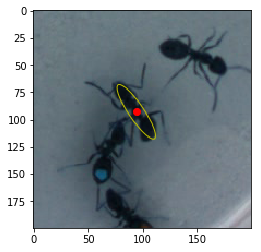

In [73]:
plt.imshow(safe_crop(save_prediction_img(None, 1, img, pred=prediction, scale=1.1), 
                     tuple([prediction[x] for x in ('0_x', '0_y')]), 200)[0])

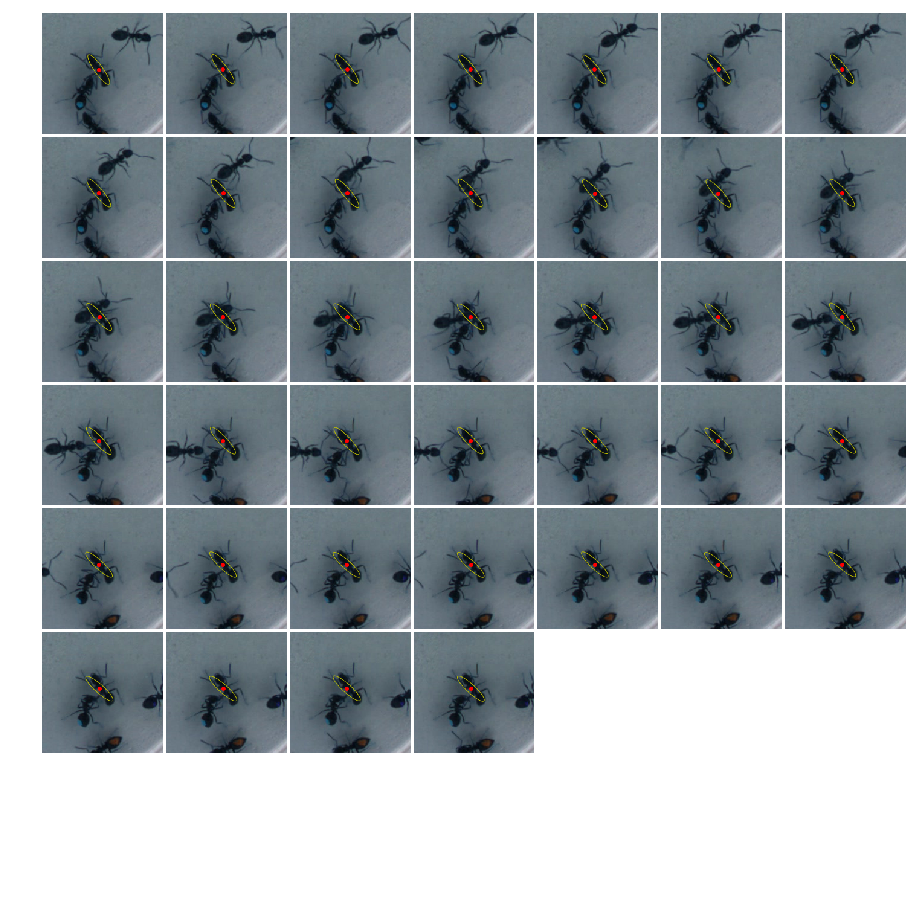

In [74]:
for i, frame in enumerate(range(first_frame - 1, first_frame - 40, -1), 1):
    prev_prediction = prediction.copy()
    img = project.img_manager.get_whole_img(frame)
    prediction, _, _, img_crop = detector.detect_single(img, prev_prediction)
#     images_crop.append(img_crop)
#     images.append(save_prediction_img(None, 1, img, gt=prediction))  # 'out/single_{:03d}.jpg'.format(i)
    images.append(safe_crop(save_prediction_img(None, 1, img, pred=prediction, gt=None, scale=1.1), 
                         tuple([prediction[x] for x in ('0_x', '0_y')]), 200)[0])

plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(montage(np.array(images), multichannel=True, padding_width=5, fill=(255, 255, 255)))

In [23]:
# prediction_orig = prediction.copy()
# prediction_orig['0_angle_deg'] = -timg.get_inverse_transformed_angle(prediction['0_angle_deg'])
# prediction_orig['0_x'], prediction_orig['0_y'] = timg.get_inverse_transformed_coords(np.array((prediction['0_x'], prediction['0_y'])))

# # delta_xy = pred_raw[:2] * detector.config['input_size_px'] / 2
# # xy = prev_xy + delta_xy
# # prediction = {'0_x': xy[0], '0_y': xy[1], '0_angle_deg': np.degrees(pred_raw[2] * np.pi / 2)}
# # prediction['0_major'] = 2 * r.major_axis_
# # prediction['0_minor'] = 2 * r.minor_axis_
# plt.figure(figsize=(14, 14))
# img = project.img_manager.get_whole_img(r.frame())
# plt.imshow(img)
# prev_prediction = detector.region_to_dict(r)
# # prev_prediction['0_angle_deg'] *= -1
# plot_interaction(1, prediction_orig, prev_prediction)

In [24]:
# # plt.figure(figsize=(16, 16))
# plt.axis('off')
# plt.imshow(montage(np.array(images_crop), multichannel=True, padding_width=5, fill=(255, 255, 255)))

In [79]:
regions_out = sorted(regions_out, key=lambda x: x.frame)

In [80]:
regions_in = sorted(regions_in, key=lambda x: x.frame)

In [83]:
t = interaction_in[0]
r = EllipticRegion.from_region(t.get_region(gm, -1))
t_multi = tracklet_prop[vertices[t.id()].out_neighbours().next()]
frame = r.frame + 1
prev_prediction = r.to_dict()

KeyError: 4201

In [43]:
prediction = detector.detect_single_frame(frame, prev_prediction, project)
frame += 1
prev_prediction = prediction
print prediction

________________________________________________________________________________
[Memory] Calling core.interactions.detect._detect_single_frame...
_detect_single_frame(1310, { '0_angle_deg': -4.818127657666864,
  '0_major': 48.24492313014261,
  '0_minor': 16.124999509992683,
  '0_x': 566.5372568110772,
  '0_y': 657.8412213292343})
______________________________________________detect_single_frame - 0.2s, 0.0min
{'0_minor': 16.124999509992683, '0_major': 48.24492313014261, '0_angle_deg': -5.332102324262323, '0_x': 567.7660386423347, '0_y': 658.4315819118669}


3053.0
3135.0
3062.0
3040.0
2584.0
2569.5
2602.5
2956.0
3089.0
2887.0
3036.5
2745.5
2823.0
2906.5
2827.0
2839.0
3004.5
3000.5
2943.0
2823.0
2815.0
3093.5
3226.0
2914.5
3479.5
2860.5
2865.5
3082.0
3079.5
2864.0
2972.5
1622.08483887
1828.44812012
2113.13378906
2015.70214844
2900.57763672
2816.5
2803.5
2208.27856445
2197.47094727
2746.50048828
2895.99975586
2690.5
2637.5
2809.0
1914.4987793
1936.27783203
1950.76318359
1887.46777344
1924.42358398
1875.17431641
3085.5
2694.91772461
2873.58740234
3123.90136719
2372.1328125
2116.83251953
2246.00732422
2268.28662109
2228.86523438
2033.55041504
2022.71960449
2193.80639648
2126.71240234
2048.4284668
2030.63464355
1983.2109375
1989.07641602
1905.56884766
1945.05834961
1988.89746094
2087.27539062
2000.76696777
1998.73730469
2034.9576416
2058.27294922
1902.04370117
2020.47180176
1838.82763672
1901.4342041
2694.0
2143.92260742
2032.13525391
2699.0
2860.5
2690.5
2956.5
2803.0
2822.0
2895.0
2993.5
2553.5
2476.0
3085.0
2358.0
2370.5
2356.5
2257.5
2256.

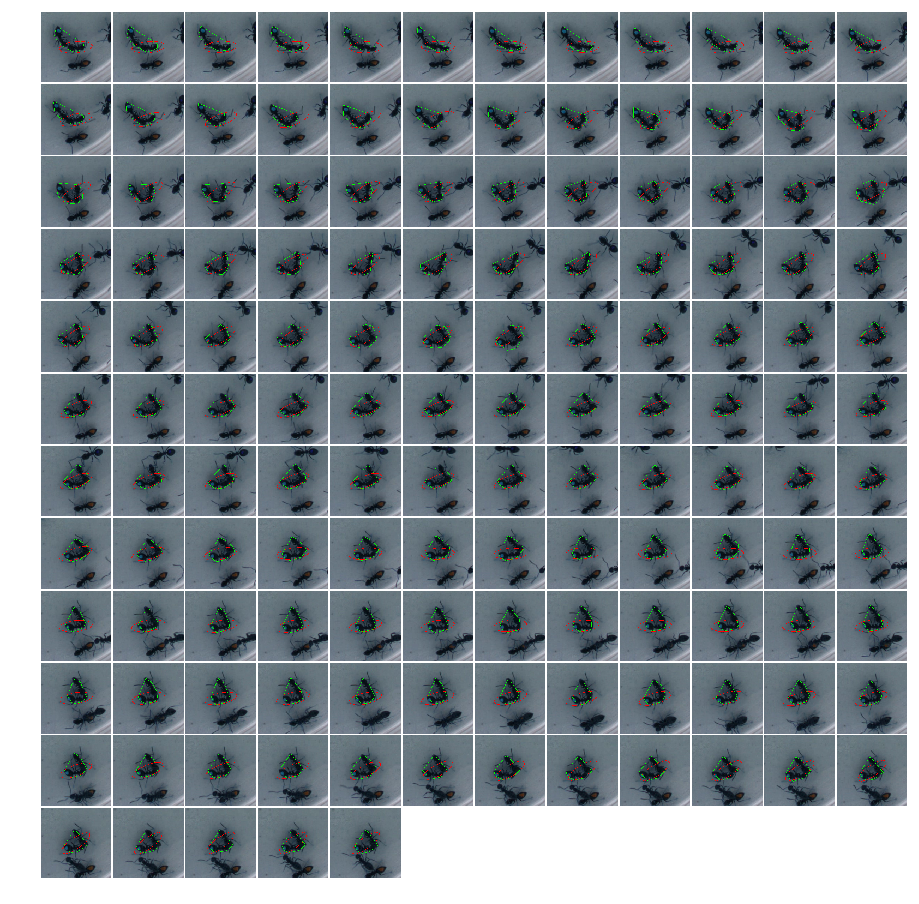

In [93]:
t = interaction_in[2]
r = EllipticRegion.from_region(t.get_region(gm, -1))
t_multi = tracklet_prop[vertices[t.id()].out_neighbours().next()]



frame, images = track_through_multi(r, t_multi, project) # , max_frames=40)
# poly1, poly2 = track_through_multi(r, t_multi, project, max_frames=40)
plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(montage(np.array(images), multichannel=True, padding_width=5, fill=(255, 255, 255)))

In [100]:
t_multi.id()

1272

(1622.0848388671875, array([[[543.41, 665.69]],
 
        [[533.  , 661.  ]],
 
        [[524.45, 656.73]],
 
        [[525.  , 654.  ]],
 
        [[537.  , 640.  ]],
 
        [[557.  , 626.  ]],
 
        [[573.39, 618.55]],
 
        [[577.  , 661.  ]],
 
        [[553.  , 670.  ]]], dtype=float32))

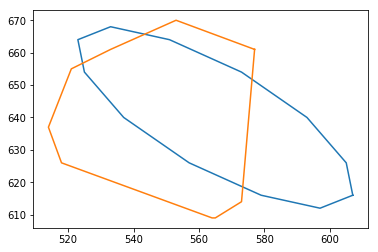

In [90]:
poly3 = np.vstack((poly2, poly2[0:1]))
plt.plot(poly1[:, 0], poly1[:, 1])
plt.plot(poly3[:, 0], poly3[:, 1])
cv2.intersectConvexConvex(poly1, poly3)

In [88]:
poly3

array([[577, 661],
       [553, 670],
       [533, 661],
       [521, 655],
       [514, 637],
       [518, 626],
       [564, 609],
       [565, 609],
       [573, 614],
       [573, 614]], dtype=int32)

array([[577, 661],
       [553, 670],
       [533, 661],
       [521, 655],
       [514, 637],
       [518, 626],
       [564, 609],
       [565, 609],
       [573, 614],
       [573, 614]], dtype=int32)

array([[573, 614]], dtype=int32)

array([[573, 614]], dtype=int32)

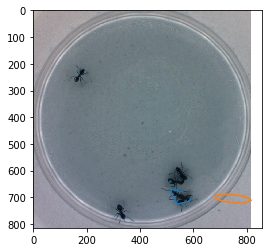

In [745]:
plt.imshow(img)
hull = get_hull_poly(t_multi.get_region(gm, i - 1))
plt.plot(hull[:, 0], hull[:, 1])
xy = EllipticRegion.from_dict(prediction).to_poly()
plt.plot(xy[:, 0], xy[:, 1])
_, intersection = cv2.intersectConvexConvex(xy, hull)
intersection = intersection.reshape((-1, 2))
# plt.plot(intersection[:, 0], intersection[:, 1])

In [734]:
EllipticRegion.from_dict(prediction).

{'angle_deg': 5.946803719735918,
 'frame': None,
 'major': 67.48375253246851,
 'minor': 15.7542368341527,
 'x': 748.1656192874361,
 'y': 705.5256543433397}

In [709]:
t = interaction_in[0]

img = project.img_manager.get_whole_img(r.frame)
plt.imshow(safe_crop(save_prediction_img(None, 1, img, pred=r.to_dict(), gt=None, scale=1.1), 
                     tuple((r.x, r.y)), 200)[0])

TypeError: unsupported operand type(s) for -: 'instancemethod' and 'int'

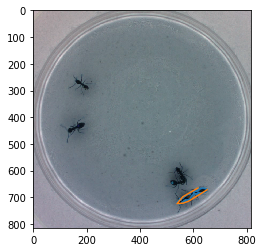

In [707]:
for v in vertices[interaction_in[0].id()].out_neighbours():
    t = tracklet_prop[v]
# t = interaction_multi[5]    
r = t.get_region(gm, 0)
yx = r.contour()
plt.imshow(project.img_manager.get_whole_img(r.frame()))
plt.plot(yx[:, 1], yx[:, 0])
hull = get_hull_poly(r)
plt.plot(hull[:, 0], hull[:, 1])

In [702]:
hull

array([[576, 649],
       [561, 658],
       [545, 660],
       [534, 655],
       [525, 641],
       [539, 589],
       [575, 626]], dtype=int32)

In [22]:
# for t in interaction_in:
#     r = t.get_region(project.gm, -1)
#     # r = t.get_region(project.gm, 0)
#     # regions = [t.get_region(project.gm, 0) for t in tracklet.exiting_tracklets(project.gm)]
#     plt.figure(figsize=(16, 16))
#     plt.imshow(project.img_manager.get_whole_img(r.frame()))
# #                get_ crop(regions[0].frame(), roi_union))
#     plt.title('Frame {frame}, Tracklet {tracklet}'.format(frame=r.frame(), tracklet=t.id()))
#     yx = r.contour_without_holes()  #  - roi_union.top_left_corner()
#     plt.plot(yx[:, 1], yx[:, 0])

In [328]:
# interaction = [project.chm[2939]]

In [338]:
# regions = []
# for t in interaction:
#     regions.extend(t.r_gen(project.gm, project.rm))
# rois = [r.roi() for r in regions]
# roi_union = reduce(lambda x, y: x.union(y), rois)
# frames = [r.frame() for r in regions]
# images = [project.img_manager.get_crop(f, roi_union) for f in range(min(frames) - 10, max(frames) + 10)]

In [14]:
# # regions = [t.get_region(project.gm, -1) for t in tracklet.entering_tracklets(project.gm)]
# regions = [t.get_region(project.gm, 0) for t in tracklet.exiting_tracklets(project.gm)]


# # regions = [t.get_region(project.gm, -1) for t in tracklet.entering_tracklets(project.gm) if t.get_cardinality(gm) == 1]
# # regions = [t.get_region(project.gm, 0) for t in tracklet.exiting_tracklets(project.gm) if t.get_cardinality(gm) == 1]
# plt.figure(figsize=(16, 16))
# plt.imshow(project.img_manager.get_crop(regions[0].frame(), roi_union))
# for region in regions:
#     yx = region.contour_without_holes() - roi_union.top_left_corner()
#     plt.plot(yx[:, 1], yx[:, 0])

In [1]:
dpi = 72.0
xpixels, ypixels = images[0].shape[0], images[0].shape[1]
fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
im = plt.figimage(images[0])

def animate(i):
    im.set_array(images[i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, frames=len(images), )
# HTML(anim.to_html5_video())
anim.save('/home/matej/a.mp4')
HTML(anim.to_jshtml(default_mode='loop'))